## Observations and Insights 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results_df = pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
print(mouse_metadata.count())
print(study_results.count())
print(mouse_results_df.count())
mouse_results_df.head()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64
Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64
Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [335]:
infubinol_all_df = mouse_results_df.loc[mouse_results_df['Drug Regimen'] == "Infubinol"]
infubinol_all_df.sort_values('Tumor Volume (mm3)')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
669,c326,Infubinol,Female,18,25,5,36.321346,0
454,a203,Infubinol,Female,20,23,0,45.000000,0
1679,w193,Infubinol,Male,22,30,0,45.000000,0
628,c139,Infubinol,Male,11,28,0,45.000000,0
1637,v766,Infubinol,Male,16,27,0,45.000000,0
...,...,...,...,...,...,...,...,...
1813,y163,Infubinol,Female,17,27,45,67.685569,3
635,c139,Infubinol,Male,11,28,35,67.821420,1
463,a203,Infubinol,Female,20,23,45,67.973419,2
636,c139,Infubinol,Male,11,28,40,69.428141,2


In [354]:
# Create DataFrame that return max Timepoint per mice (by ID number) that shows up for Mouse ID and Timepoint. 
mouse_group = mouse_results_df.groupby(["Mouse ID"])['Timepoint'].transform(max) == mouse_results_df['Timepoint']



max_result_df = mouse_results_df[mouse_group]


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
max_result_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,45.000000,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [355]:
# Checking the number of mice in the clean DataFrame.
print(max_result_df["Mouse ID"].count())

249


## Summary Statistics

In [356]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_tumor_by_regimen_df = max_result_df[['Drug Regimen','Tumor Volume (mm3)']]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stat_by_regimen = stat_tumor_by_regimen_df.groupby("Drug Regimen").describe()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_by_regimen = stat_tumor_by_regimen_df.groupby("Drug Regimen").mean()
median_by_regimen = stat_tumor_by_regimen_df.groupby("Drug Regimen").median()
var_by_regimen = stat_tumor_by_regimen_df.groupby("Drug Regimen").var()
std_by_regimen = stat_tumor_by_regimen_df.groupby("Drug Regimen").std()
sem_by_regimen = stat_tumor_by_regimen_df.groupby("Drug Regimen").sem()

# Assemble the resulting series into a single summary dataframe.
sum_stats_by_regimen_df = pd.DataFrame({"Mean":mean_by_regimen['Tumor Volume (mm3)'],
                                        "Median":median_by_regimen['Tumor Volume (mm3)'],
                                        "Variance":var_by_regimen['Tumor Volume (mm3)'],
                                        "Std Dev":std_by_regimen['Tumor Volume (mm3)'],
                                        "SEM":sem_by_regimen['Tumor Volume (mm3)']}).reset_index()


In [357]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sum_stats_by_regimen_df

# Using the aggregation method, produce the same summary statistics in a single line
#???? Don't understand directions, not required?????
#agg_df = sum_stats_by_regimen_df.agg(['mean'])
#agg_df

,Drug Regimen,Mean,Median,Variance,Std Dev,SEM
0,Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
1,Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
2,Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
3,Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
4,Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
5,Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
6,Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
7,Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
8,Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056
9,Zoniferol,59.181258,61.840058,76.862027,8.767099,1.753420


## Bar and Pie Charts

<IPython.core.display.Javascript object>


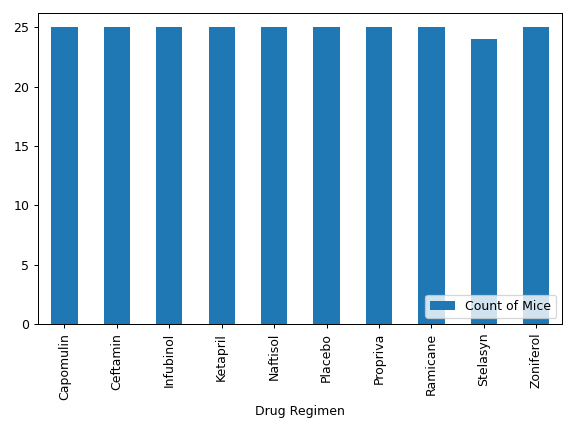

In [358]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

count_by_regimen = stat_tumor_by_regimen_df.groupby("Drug Regimen").count().reset_index()
count_by_regimen = count_by_regimen.rename(columns={'Tumor Volume (mm3)':'Count of Mice'})
x_axis = np.arange(len(count_by_regimen))

count_by_regimen.plot(kind='bar',x= "Drug Regimen",y= 'Count of Mice').legend(loc='lower right')
plt.tight_layout()

<IPython.core.display.Javascript object>


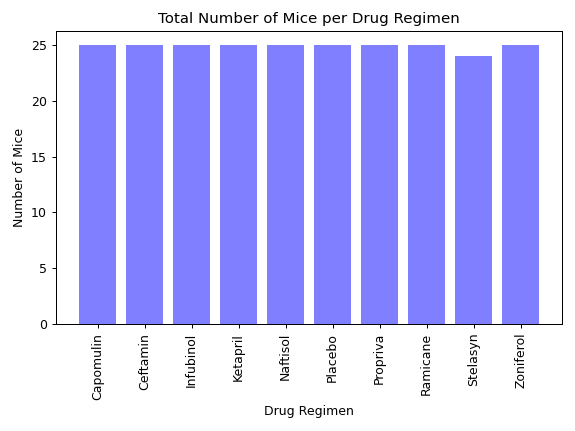

In [359]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure()
plt.bar(x_axis,count_by_regimen['Count of Mice'],color='b', alpha=0.5, align="center",)

#Format bar chart
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, count_by_regimen['Drug Regimen'], rotation="vertical")

plt.title("Total Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()


<IPython.core.display.Javascript object>


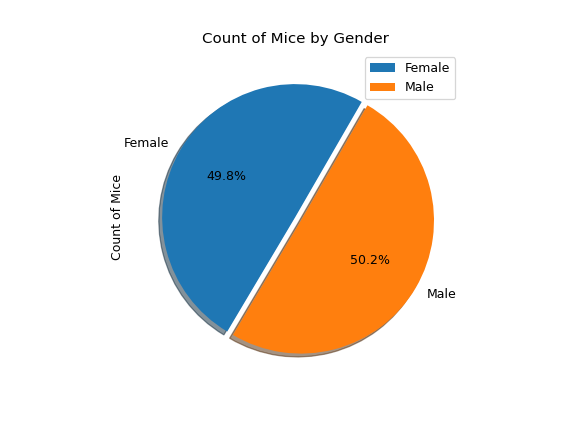

In [360]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
max_result_df.groupby('Sex').count()

count_by_gender_df = max_result_df.groupby('Sex').count()
count_by_gender_df = count_by_gender_df.rename(columns={'Mouse ID':'Count of Mice'})

plot = count_by_gender_df.plot(kind='pie',y='Count of Mice',title="Count of Mice by Gender",shadow=True,explode=(0,0.05), autopct='%1.1f%%',startangle=60)


In [361]:
count_by_gender_df

,Count of Mice,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,124,124,124,124,124,124,124
Male,125,125,125,125,125,125,125


<IPython.core.display.Javascript object>


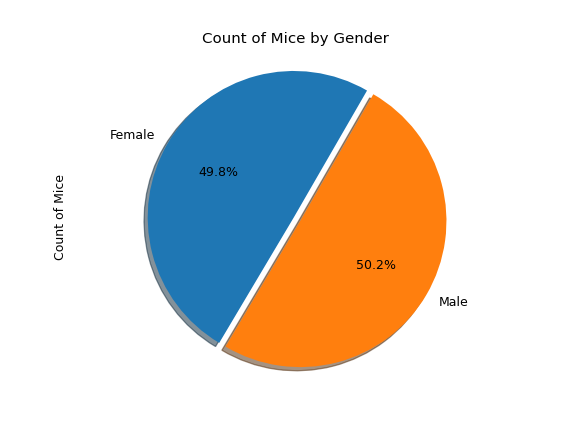

(-1.1385516836321594,
 1.1560888593574177,
 -1.1372747920091575,
 1.137673838142574)

In [362]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure()

plt.pie(count_by_gender_df['Count of Mice'],labels=count_by_gender_df.index,shadow=True,autopct='%1.1f%%',explode=(0,0.05),startangle=60)
plt.title("Count of Mice by Gender")
plt.ylabel("Count of Mice")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [363]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin 

capomulin_df = max_result_df.loc[max_result_df['Drug Regimen'] == "Capomulin"]
capomulin_df = capomulin_df.sort_values(['Tumor Volume (mm3)'])
capomulin = capomulin_df['Tumor Volume (mm3)']
capomulin_quartiles = capomulin.quantile([0.25,0.5,0.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
capomulin_outlier_mice = capomulin_df.loc[(capomulin_df['Tumor Volume (mm3)'] < capomulin_lower_bound) \
                                | (capomulin_df['Tumor Volume (mm3)'] > capomulin_upper_bound)]

print(f"The lower quartile of Capomulin is: {round(capomulin_lowerq,2)}")
print(f"The upper quartile of Capomulin is: {round(capomulin_upperq,2)}")
print(f"The interquartile range (IQR) of Capomulin is: {round(capomulin_iqr,3)}")
print(f"The the median of Capomulin is: {round(capomulin_quartiles[0.5],2)} ")
print(f"Values below {round(capomulin_lower_bound,2)} could be outliers.")
print(f"Values above {round(capomulin_upper_bound,2)} could be outliers.")
print("No outlier values identified for Capomulin")

#outlier table empty, no outliers exist
capomulin_outlier_mice
capomulin
capomulin_df

The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range (IQR) of Capomulin is: 7.782
The the median of Capomulin is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
No outlier values identified for Capomulin


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
39,m601,Capomulin,Male,22,17,45,28.430964,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
134,r554,Capomulin,Female,8,17,45,32.377357,3
144,m957,Capomulin,Female,3,19,45,33.329098,1
164,t565,Capomulin,Female,20,17,45,34.455298,0
224,w914,Capomulin,Male,24,21,45,36.041047,2


<IPython.core.display.Javascript object>


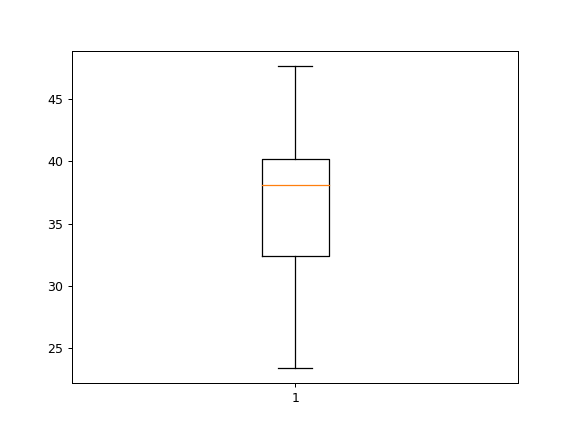

In [364]:
fig1, ax = plt.subplots()
ax.boxplot(capomulin)
plt.show()

In [365]:
#Ramicane 
ramicane_df = max_result_df.loc[max_result_df['Drug Regimen'] == "Ramicane"]
ramicane_df = ramicane_df.sort_values(['Tumor Volume (mm3)'])
ramicane = ramicane_df['Tumor Volume (mm3)']
ramicane_quartiles = ramicane.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
ramicane_outlier_mice = ramicane_df.loc[(ramicane_df['Tumor Volume (mm3)'] < ramicane_lower_bound) \
                                | (ramicane_df['Tumor Volume (mm3)'] > ramicane_upper_bound)]

print(f"The lower quartile of Ramicane is: {round(ramicane_lowerq,2)}")
print(f"The upper quartile of Ramicane is: {round(ramicane_upperq,2)}")
print(f"The interquartile range  (IQR) of Ramicane is: {round(ramicane_iqr,3)}")
print(f"The the median of Ramicane is: {round(ramicane_quartiles[0.5],2)} ")
print(f"Values below {round(ramicane_lower_bound,2)} could be outliers.")
print(f"Values above {round(ramicane_upper_bound,2)} could be outliers.")
print("No outlier values identified for Ramicane")

#outlier table empty, no outliers exist
ramicane_outlier_mice
ramicane

The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range  (IQR) of Ramicane is: 9.099
The the median of Ramicane is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
No outlier values identified for Ramicane


9      22.050126
49     29.128472
59     30.276232
74     30.564625
84     30.638696
114    31.095335
94     31.560470
174    32.978522
154    33.397653
184    33.562402
194    36.134852
254    36.374510
262    36.561652
234    37.225650
272    37.311236
289    38.342008
327    38.407618
214    38.810366
400    40.659006
410    40.667713
430    43.047543
449    43.166373
447    43.419381
453    44.183451
420    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [366]:
#Infubinol
infubinol_df = max_result_df.loc[max_result_df['Drug Regimen'] == "Infubinol"]
infubinol_df = infubinol_df.sort_values(['Tumor Volume (mm3)'])
infubinol = infubinol_df['Tumor Volume (mm3)']
infubinol_quartiles = infubinol.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
infubinol_outlier_mice = infubinol_df.loc[(infubinol_df['Tumor Volume (mm3)'] < infubinol_lower_bound) \
                                | (infubinol_df['Tumor Volume (mm3)'] > infubinol_upper_bound)]

print(f"The lower quartile of Infubinol is: {round(infubinol_lowerq,2)}")
print(f"The upper quartile of Infubinol is: {round(infubinol_upperq,2)}")
print(f"The interquartile range  (IQR) of Infubinol is: {round(infubinol_iqr,2)}")
print(f"The the median of Infubinol is: {round(infubinol_quartiles[0.5],2)} ")
print(f"Values below {round(infubinol_lower_bound,2)} could be outliers.")
print(f"Values above {round(infubinol_upper_bound,2)} could be outliers.")
print("No outlier values identified for Infubinol")

#outlier table empty, no outliers exist

infubinol_outlier_mice
infubinol_df

The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range  (IQR) of Infubinol is: 11.48
The the median of Infubinol is: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
No outlier values identified for Infubinol


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
669,c326,Infubinol,Female,18,25,5,36.321346,0
1314,o813,Infubinol,Male,24,28,5,45.699331,0
1616,v339,Infubinol,Male,20,26,5,46.250112,0
1205,m756,Infubinol,Male,19,30,5,47.010364,1
1683,w193,Infubinol,Male,22,30,20,50.005138,0
1640,v766,Infubinol,Male,16,27,15,51.542431,1
1632,v719,Infubinol,Female,17,30,20,54.048608,1
1397,q132,Infubinol,Female,1,30,30,54.656549,4
1312,o809,Infubinol,Male,3,25,35,55.629428,1
1485,s121,Infubinol,Male,23,26,25,55.650681,2


In [367]:
#Ceftamin
ceftamin_df = max_result_df.loc[max_result_df['Drug Regimen'] == "Ceftamin"].reset_index()
ceftamin_df = ceftamin_df.sort_values(['Tumor Volume (mm3)'])
ceftamin = ceftamin_df['Tumor Volume (mm3)']
ceftamin_quartiles = ceftamin.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
ceftamin_outlier_mice = ceftamin_df.loc[(ceftamin_df['Tumor Volume (mm3)'] < ceftamin_lower_bound) \
                                | (ceftamin_df['Tumor Volume (mm3)'] > ceftamin_upper_bound)]

print(f"The lower quartile of Ceftamin is: {round(ceftamin_lowerq,2)}")
print(f"The upper quartile of Ceftamin is: {round(ceftamin_upperq,2)}")
print(f"The interquartile range  (IQR) of Ceftamin is: {round(ceftamin_iqr,2)}")
print(f"The the median of Ceftamin is: {round(ceftamin_quartiles[0.5],2)} ")
print(f"Values below {round(ceftamin_lower_bound,2)} could be outliers.")
print(f"Values above {round(ceftamin_upper_bound,2)} could be outliers.")
print(f"Outlier values listed in table below:")

print(ceftamin_outlier_mice['Tumor Volume (mm3)'].count())
ceftamin

The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile range  (IQR) of Ceftamin is: 15.58
The the median of Ceftamin is: 59.85 
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.
Outlier values listed in table below:
0


20    45.000000
1     45.000000
18    45.000000
16    45.000000
10    46.784535
5     47.784682
4     48.722078
17    52.925348
3     55.742829
2     56.057749
9     57.918381
13    59.741901
11    59.851956
22    61.386660
14    61.433892
6     61.849023
0     62.999356
15    64.192341
12    64.299830
21    64.634949
24    64.729837
19    67.527482
8     67.748662
23    68.594745
7     68.923185
Name: Tumor Volume (mm3), dtype: float64

In [368]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bound

<IPython.core.display.Javascript object>


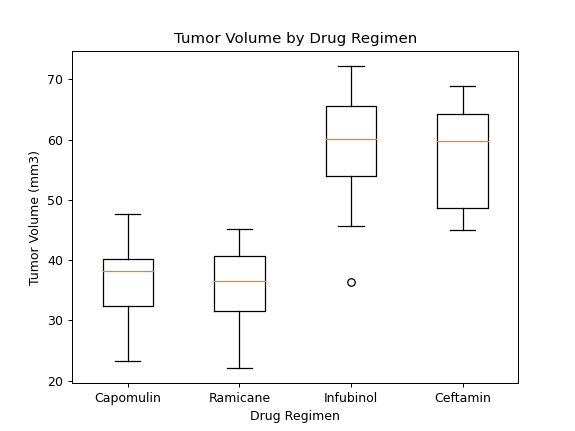

In [369]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [capomulin,ramicane,infubinol,ceftamin]

fig7, ax7 = plt.subplots()
ax7.set_title('Tumor Volume by Drug Regimen')
ax7.boxplot(data, labels = drug_regimen_list)
ax7.set_xlabel('Drug Regimen')
ax7.set_ylabel('Tumor Volume (mm3)')
plt.show()

#No outliers currently in data... when data is fixed...
#flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
#                 linestyle='none')


## Line and Scatter Plots

In [370]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
m957_mouse_results = mouse_results_df.loc[mouse_results_df['Mouse ID'] == "m957"].reset_index()
m957_mouse_results

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,135,m957,Capomulin,Female,3,19,0,45.000000,0
1,136,m957,Capomulin,Female,3,19,5,45.622381,1
2,137,m957,Capomulin,Female,3,19,10,46.414518,1
3,138,m957,Capomulin,Female,3,19,15,39.804453,1
4,139,m957,Capomulin,Female,3,19,20,38.909349,1
5,140,m957,Capomulin,Female,3,19,25,37.695432,1
6,141,m957,Capomulin,Female,3,19,30,38.212479,1
7,142,m957,Capomulin,Female,3,19,35,32.562839,1
8,143,m957,Capomulin,Female,3,19,40,32.947615,1
9,144,m957,Capomulin,Female,3,19,45,33.329098,1


In [371]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [372]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


## Observations and Insights

observation #1: blah blah blah